импортировала датасет и все нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import numpy as np

dataframe_movies = pd.read_csv('top-500-movies.csv', sep=',')

исключили лишнюю таблицу со ссылками на фильмы

In [2]:
dataframe_movies = dataframe_movies.drop(columns = 'url', axis = 1)

удалила пустые значения

In [3]:
dataframe_movies = dataframe_movies.dropna()

In [4]:
dataframe_movies

,rank,release_date,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,2008-02-14,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008.0
494,495,2004-10-22,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004.0
495,496,2013-02-06,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0
496,497,2004-04-09,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0


разделила столбец с датой на несколько столбцов


In [5]:
dataframe_movies['release_year'], dataframe_movies['release_month'], dataframe_movies['release_day'] = dataframe_movies['release_date'].str.split('-', 2).str

C:\Users\123\AppData\Local\Temp\ipykernel_18992\664414357.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  dataframe_movies['release_year'], dataframe_movies['release_month'], dataframe_movies['release_day'] = dataframe_movies['release_date'].str.split('-', 2).str


In [6]:
dataframe_movies

,rank,release_date,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,release_year,release_month,release_day
0,1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,2019,04,23
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,2011,05,20
2,3,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,2015,04,22
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,2015,12,16
4,5,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,2018,04,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,2008-02-14,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008.0,2008,02,14
494,495,2004-10-22,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004.0,2004,10,22
495,496,2013-02-06,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0,2013,02,06
496,497,2004-04-09,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0,2004,04,09


удалила отдельные столбцы с датой и днём


In [7]:
dataframe_movies = dataframe_movies.drop(columns = ['release_date', 'release_day'])
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,release_year,release_month
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,2019,04
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,2011,05
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,2015,04
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,2015,12
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,2018,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008.0,2008,02
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004.0,2004,10
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0,2013,02
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0,2004,04


обозначила фильмы для взрослых


In [8]:
dataframe_movies['adults'] = dataframe_movies['mpaa'].apply(lambda x:1 if x == 'R' else 0)

In [9]:
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,release_year,release_month,adults
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,2019,04,0
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,2011,05,0
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,2015,04,0
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,2015,12,0
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,2018,04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008.0,2008,02,0
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004.0,2004,10,0
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0,2013,02,1
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0,2004,04,0


узнала точное количество и состав уникальных рейтингов для фильмов


In [10]:
qwe1 = dataframe_movies['mpaa']
qwe1 = qwe1.tolist()
qwe1 = set(qwe1)
qwe1

{'G', 'PG', 'PG-13', 'R'}

то же самое, но для годов выпуска


In [11]:
qwe2 = dataframe_movies['release_year']
qwe2 = qwe2.tolist()
qwe2 = set(qwe2)
qwe2

{'1991',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022'}

создала функцию для разбивки на года (именно на временные периоды)


In [12]:
def year_maker(year):
    if year in range(1991,2000):
        return '1990-ые'
    elif year in range(2000,2010):
        return '2000-ыe'
    elif year in range(2010,2020):
        return '2010-ыe'
    else:
        return '2020-ыe'

при проверке выяснила, что года и месяца читаются неправильно, присвоила им значения int


In [13]:
dataframe_movies = dataframe_movies.astype({'release_year': 'int64'})
dataframe_movies = dataframe_movies.astype({'release_month': 'int64'})

создала отдельную колонку с десятилетиями


In [14]:
dataframe_movies['year period'] = dataframe_movies['release_year'].apply(year_maker)

та же самая функция, но для месяцев - разбила на весну, лето, осень и зиму


In [15]:
def season_maker(month):
    if month in range(3,6):
        return 'spring'
    elif month in range(6,9):
        return 'summer'
    elif month in range(9,12):
        return 'autumn'
    else:
        return 'winter'

так же создала отдельную колонку с месяцами


In [16]:
dataframe_movies['сезон'] = dataframe_movies['release_month'].apply(season_maker)

In [17]:
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,release_year,release_month,adults,year period,сезон
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,2019,4,0,2010-ыe,spring
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,2011,5,0,2010-ыe,spring
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,2015,4,0,2010-ыe,spring
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,2015,12,0,2010-ыe,winter
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,2018,4,0,2010-ыe,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008.0,2008,2,0,2000-ыe,winter
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004.0,2004,10,0,2000-ыe,autumn
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0,2013,2,1,2010-ыe,winter
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0,2004,4,0,2000-ыe,spring


удалила колонку с годами


In [18]:
dataframe_movies = dataframe_movies.drop(columns = ['year'])

In [19]:
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,release_year,release_month,adults,year period,сезон
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019,4,0,2010-ыe,spring
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011,5,0,2010-ыe,spring
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015,4,0,2010-ыe,spring
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015,12,0,2010-ыe,winter
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018,4,0,2010-ыe,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008,2,0,2000-ыe,winter
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004,10,0,2000-ыe,autumn
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013,2,1,2010-ыe,winter
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004,4,0,2000-ыe,spring


график по годам и месяцам - заметен постепенный рост выхода фильмов к 2013-2016 годам, потом постепенный спад их количества


<AxesSubplot:xlabel='release_year'>

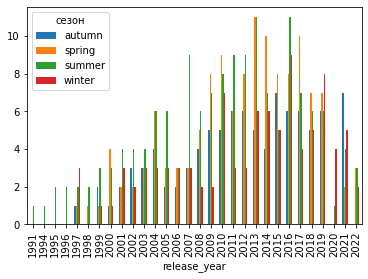

In [20]:
dataframe_movies.groupby('release_year')['сезон'].value_counts().unstack().plot(kind = 'bar')

наибольшее количество фильмов из датафрейма вышло в 2010-ые годы весной


<AxesSubplot:xlabel='year period'>

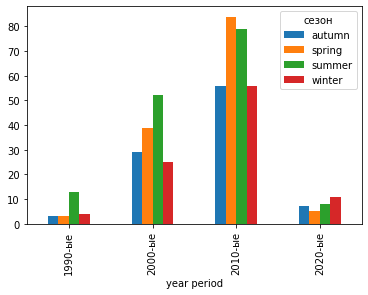

In [21]:
dataframe_movies.groupby('year period')['сезон'].value_counts().unstack().plot(kind = 'bar')

самое большое количество фильмов имеет рейтинг PG-13


<AxesSubplot:>

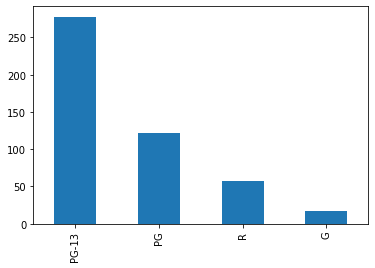

In [22]:
dataframe_movies['mpaa'].value_counts().plot(kind = 'bar')

для графика в plt создала отдельную переменную, в начале прописала загрузку библиотеки


In [23]:
df_genre = dataframe_movies.genre.value_counts()

In [24]:
df_genre

Adventure            205
Action               195
Drama                 25
Thriller/Suspense     21
Comedy                10
Musical                8
Western                3
Horror                 3
Black Comedy           3
Romantic Comedy        1
Name: genre, dtype: int64

сам график plt. Видно, что самые популярные жанры фильмов - Adventure и Action


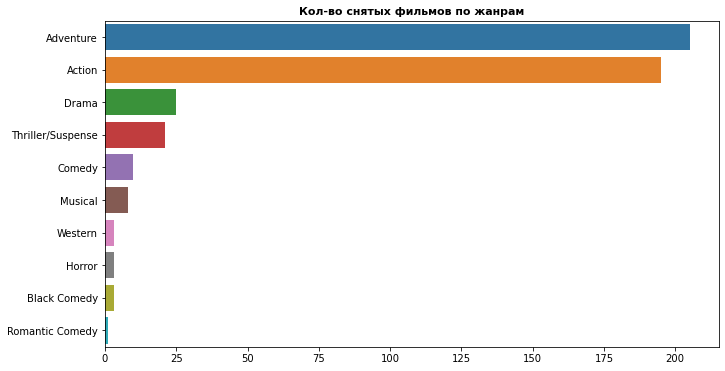

In [25]:
plt.figure(figsize = (11,6))
plt.title('Кол-во снятых фильмов по жанрам', fontsize = 11, fontweight = 'bold')
sns.barplot(y = df_genre.index, x = df_genre.values, alpha = 1)
plt.tick_params(labelsize = 10)

In [26]:
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,release_year,release_month,adults,year period,сезон
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019,4,0,2010-ыe,spring
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011,5,0,2010-ыe,spring
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015,4,0,2010-ыe,spring
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015,12,0,2010-ыe,winter
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018,4,0,2010-ыe,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008,2,0,2000-ыe,winter
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004,10,0,2000-ыe,autumn
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013,2,1,2010-ыe,winter
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004,4,0,2000-ыe,spring


вынесла в отдельный список потраченные бюджеты на все имеющиеся фильмы


In [27]:
production_cost_list = dataframe_movies['production_cost'].tolist()

при помощи цикла разделила все бюджеты на 1 тысячу, чтобы далее корректно отображались медиана и среднее 


In [28]:
production_cost_del = []

for i in production_cost_list:
    production_cost_del.append(i/1000)

занесла обратно разделенные бюджеты в датафрейм


In [29]:
dataframe_movies['production_cost_del'] = production_cost_del

так же сократила прибыль по миру


In [30]:
worldwide_gross_list = dataframe_movies['worldwide_gross'].tolist()

worldwide_gross_del = []

for i in worldwide_gross_list:
    worldwide_gross_del.append(i/1000)
    
dataframe_movies['worldwide_gross_del'] = worldwide_gross_del

так же сократила домашние сборы


In [31]:
domestic_gross_list = dataframe_movies['domestic_gross'].tolist()

domestic_gross_del = []

for i in domestic_gross_list:
    domestic_gross_del.append(i/1000)
    
dataframe_movies['domestic_gross_del'] = domestic_gross_del

сделала пивотальную таблицу - среднее и медиана по трем сокращенным переменным\
можно увидеть, что в 2010-ые были самые большие траты на бюджет и самые большие выручки от фильмов


In [32]:
dataframe_movies.pivot_table(index = 'year period',
                    values = ['production_cost_del', 'worldwide_gross_del', 'domestic_gross_del'],
                    aggfunc=['mean', 'median'])

mean                                          \
            domestic_gross_del production_cost_del worldwide_gross_del   
year period                                                              
1990-ые          154059.370000       123478.260870       408154.765565   
2000-ыe          170320.010972       137840.000000       425047.173331   
2010-ыe          182550.034269       155866.909091       532979.038044   
2020-ыe          175108.743806       169838.709677       444619.474710   

                        median                                          
            domestic_gross_del production_cost_del worldwide_gross_del  
year period                                                             
1990-ые             125304.276            115000.0          298815.224  
2000-ыe             137855.863            130000.0          358858.124  
2010-ыe             144840.419            150000.0          409953.905  
2020-ыe             108327.830            175000.0          362450.957

по выходу фильмов по месяцам также видно, что самый "жаркий" сезон у киноделов - весна


In [33]:
dataframe_movies.pivot_table(index = 'сезон',
                    values = ['worldwide_gross_del', 'domestic_gross_del'],
                    aggfunc=['mean', 'median'])

mean                                 median  \
       domestic_gross_del worldwide_gross_del domestic_gross_del   
сезон                                                              
autumn      155510.422442       447651.800663        135386.6650   
spring      203792.231084       565873.710252        173005.9450   
summer      173901.527355       463894.957382        139333.4190   
winter      166313.468969       460452.378031        107222.6265   

                            
       worldwide_gross_del  
сезон                       
autumn         361730.6600  
spring         456258.5390  
summer         363875.4785  
winter         293663.0580

у "среднего" фильма из списка было около 3700 кинозалов


In [34]:
print(dataframe_movies['theaters'].mean())
print(dataframe_movies['theaters'].median())

3668.92194092827
3739.5


сделала отдельный датафрейм для вычисления дисперсии и среднеквадратичного отклонения по количеству фильмов в год и сезон


In [35]:
df_1 = dataframe_movies.groupby(['year period', 'сезон']).size().reset_index(name='count')

In [36]:
df_1

,year period,сезон,count
0,1990-ые,autumn,3
1,1990-ые,spring,3
2,1990-ые,summer,13
3,1990-ые,winter,4
4,2000-ыe,autumn,29
5,2000-ыe,spring,39
6,2000-ыe,summer,52
7,2000-ыe,winter,25
8,2010-ыe,autumn,56
9,2010-ыe,spring,84


In [37]:
df_1.describe()['count']

count    16.000000
mean     29.625000
std      27.904301
min       3.000000
25%       6.500000
50%      19.000000
75%      53.000000
max      84.000000
Name: count, dtype: float64

In [38]:
print('Разница квартилей:', np.percentile(df_1['count'], 75) - np.percentile(df_1['count'], 25))
print('Дисперсия для ген. совокупности =', df_1['count'].var(ddof = 0))
print('Среднеквадратичное отклонение для ген. совокупности =', df_1['count'].std(ddof = 0))

Разница квартилей: 46.5
Дисперсия для ген. совокупности = 729.984375
Среднеквадратичное отклонение для ген. совокупности = 27.018223017067573


In [39]:
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,release_year,release_month,adults,year period,сезон,production_cost_del,worldwide_gross_del,domestic_gross_del
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019,4,0,2010-ыe,spring,400000.0,2797800.564,858373.000
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011,5,0,2010-ыe,spring,379000.0,1045713.802,241071.802
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015,4,0,2010-ыe,spring,365000.0,1395316.979,459005.868
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015,12,0,2010-ыe,winter,306000.0,2064615.817,936662.225
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018,4,0,2010-ыe,spring,300000.0,2048359.754,678815.482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008,2,0,2000-ыe,winter,92500.0,162839.667,71195.053
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004,10,0,2000-ыe,autumn,92000.0,631441.092,261441.092
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013,2,1,2010-ыe,winter,92000.0,304249.198,67349.198
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004,4,0,2000-ыe,spring,92000.0,23911.362,22406.362


написала функцию для вычисления разницы между max и min значениями бюджета; создала отдельную пивотальную таблицу с бюджетами


In [40]:
def minimum_maximum(i):
    return i.max() - i.min()

dataframe_movies.pivot_table(index = 'year period',
                    values = ['production_cost_del', 'worldwide_gross_del'],
                    aggfunc=['var', 'std', minimum_maximum])

var                                     std  \
            production_cost_del worldwide_gross_del production_cost_del   
year period                                                               
1990-ые            8.009881e+08        1.909712e+11        28301.733910   
2000-ыe            1.604845e+09        1.123832e+11        40060.512215   
2010-ыe            2.634654e+09        1.538956e+11        51328.878373   
2020-ыe            1.775806e+09        1.882569e+11        42140.318599   

                                    minimum_maximum                      
            worldwide_gross_del production_cost_del worldwide_gross_del  
year period                                                              
1990-ые           437002.517447            105000.0         2146287.646  
2000-ыe           335236.021907            208000.0         2886459.543  
2010-ыe           392295.254604            309000.0         2758250.806  
2020-ыe           433885.868837            150000.0         1885699.950

уникальные значения в столбце "Жанры"; создадим для каждого отдельный датасет, чтобы потом вычислить z-оценку


In [41]:
set(list(dataframe_movies['genre']))

{'Action',
 'Adventure',
 'Black Comedy',
 'Comedy',
 'Drama',
 'Horror',
 'Musical',
 'Romantic Comedy',
 'Thriller/Suspense',
 'Western'}

In [42]:
Adventure = dataframe_movies[dataframe_movies['genre'] == 'Adventure']
Adventure['z_score'] = scipy.stats.zscore(Adventure['production_cost'])

Comedy = dataframe_movies[dataframe_movies['genre'] == 'Comedy']
Comedy['z_score'] = scipy.stats.zscore(Comedy['production_cost']) 

Horror = dataframe_movies[dataframe_movies['genre'] == 'Horror']
Horror['z_score'] = scipy.stats.zscore(Horror['production_cost']) 

Romantic_Comedy = dataframe_movies[dataframe_movies['genre'] == 'Romantic_Comedy']
Romantic_Comedy['z_score'] = scipy.stats.zscore(Romantic_Comedy['production_cost']) 

Musical = dataframe_movies[dataframe_movies['genre'] == 'Musical']
Musical['z_score'] = scipy.stats.zscore(Musical['production_cost']) 

Action = dataframe_movies[dataframe_movies['genre'] == 'Action']
Action['z_score'] = scipy.stats.zscore(Action['production_cost']) 

Thriller = dataframe_movies[dataframe_movies['genre'] == 'Thriller/Suspense']
Thriller['z_score'] = scipy.stats.zscore(Thriller['production_cost']) 

Drama = dataframe_movies[dataframe_movies['genre'] == 'Drama']
Drama['z_score'] = scipy.stats.zscore(Drama['production_cost']) 

Western = dataframe_movies[dataframe_movies['genre'] == 'Western']
Western['z_score'] = scipy.stats.zscore(Western['production_cost']) 

C:\Users\123\AppData\Local\Temp\ipykernel_18992\2433352590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adventure['z_score'] = scipy.stats.zscore(Adventure['production_cost'])
C:\Users\123\AppData\Local\Temp\ipykernel_18992\2433352590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comedy['z_score'] = scipy.stats.zscore(Comedy['production_cost'])
C:\Users\123\AppData\Local\Temp\ipykernel_18992\2433352590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

создаем новый датасет, совмещая все датасеты по каждому жанру


In [43]:
movies_z = pd.concat([Adventure, Comedy, Horror, Romantic_Comedy, Musical, Action, Thriller, Drama, Western])

In [44]:
movies_z

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,release_year,release_month,adults,year period,сезон,production_cost_del,worldwide_gross_del,domestic_gross_del,z_score
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011,5,0,2010-ыe,spring,379000.0,1045713.802,241071.802,4.727303
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015,12,0,2010-ыe,winter,306000.0,2064615.817,936662.225,3.211707
5,6,Pirates of the Caribbean: At World’s End,300000000,309420425,960996492,114732820.0,PG-13,Adventure,4362.0,167.0,2007,5,0,2000-ыe,spring,300000.0,960996.492,309420.425,3.087137
9,10,Star Wars: The Rise of Skywalker,275000000,515202542,1072848487,177383864.0,PG-13,Adventure,4406.0,142.0,2019,12,0,2010-ыe,winter,275000.0,1072848.487,515202.542,2.568098
10,11,Solo: A Star Wars Story,275000000,213767512,393151347,84420489.0,PG-13,Adventure,4381.0,135.0,2018,5,0,2010-ыe,spring,275000.0,393151.347,213767.512,2.568098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,474,Cinderella,95000000,201151353,542351353,67877361.0,PG,Drama,3848.0,105.0,2015,3,0,2010-ыe,spring,95000.0,542351.353,201151.353,-0.902660
482,483,The Lovely Bones,95000000,44114232,94894448,116616.0,PG-13,Drama,2638.0,135.0,2009,12,0,2000-ыe,winter,95000.0,94894.448,44114.232,-0.902660
33,34,The Lone Ranger,225000000,89302115,260002115,29210849.0,PG-13,Western,3904.0,149.0,2013,7,0,2010-ыe,summer,225000.0,260002.115,89302.115,1.412178
419,420,Django Unchained,100000000,162805434,449841566,30122888.0,R,Western,3012.0,165.0,2012,12,1,2010-ыe,winter,100000.0,449841.566,162805.434,-0.640406


<AxesSubplot:>

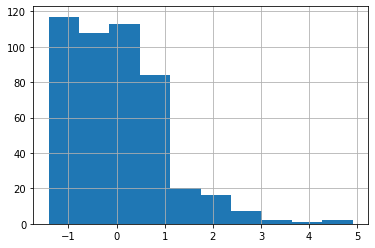

In [45]:
movies_z['z_score'].hist()

ни у одного фильма бюджет фильма статистически не является ниже, чем три стандартных отклонения


In [46]:
print(movies_z[movies_z['z_score'] < -3])
print('')
print('Минимальная z-оценка:', movies_z['z_score'].min())

Empty DataFrame
Columns: [rank, title, production_cost, domestic_gross, worldwide_gross, opening_weekend, mpaa, genre, theaters, runtime, release_year, release_month, adults, year period, сезон, production_cost_del, worldwide_gross_del, domestic_gross_del, z_score]
Index: []

Минимальная z-оценка: -1.414213562373095


сравнительно наибольшие бюджеты у вестернов, наименьший - у комедий


In [47]:
movies_z.groupby('genre')['z_score'].mean()

genre
Action               1.696649e-16
Adventure            1.776357e-16
Comedy              -3.330669e-17
Drama               -1.776357e-17
Horror               2.220446e-16
Musical              2.775558e-17
Thriller/Suspense    1.268826e-16
Western              3.700743e-17
Name: z_score, dtype: float64

для выявления корреляции немного сократим числа в столбике "opening_weekend", выразив деньги в тысячах


In [48]:
opening_weekend_list = dataframe_movies['opening_weekend'].tolist()

opening_weekend_del = []

for i in opening_weekend_list:
    opening_weekend_del.append(i/1000)
    
dataframe_movies['opening_weekend_del'] = opening_weekend_del

In [49]:
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,release_year,release_month,adults,year period,сезон,production_cost_del,worldwide_gross_del,domestic_gross_del,opening_weekend_del
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019,4,0,2010-ыe,spring,400000.0,2797800.564,858373.000,357115.007
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011,5,0,2010-ыe,spring,379000.0,1045713.802,241071.802,90151.958
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015,4,0,2010-ыe,spring,365000.0,1395316.979,459005.868,191271.109
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015,12,0,2010-ыe,winter,306000.0,2064615.817,936662.225,247966.675
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018,4,0,2010-ыe,spring,300000.0,2048359.754,678815.482,257698.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008,2,0,2000-ыe,winter,92500.0,162839.667,71195.053,19004.058
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004,10,0,2000-ыe,autumn,92000.0,631441.092,261441.092,70467.623
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013,2,1,2010-ыe,winter,92000.0,304249.198,67349.198,24834.845
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004,4,0,2000-ыe,spring,92000.0,23911.362,22406.362,9124.701


создаём переменные, между которыми будем искать корреляцию


In [50]:
gross_mean = dataframe_movies.groupby('release_year')['opening_weekend_del'].mean()
theaters_sum = dataframe_movies.groupby('release_year')['theaters'].sum()

совмещаем по оси Y два датафрейма


In [51]:
movies_correlation = pd.concat([gross_mean, theaters_sum], axis=1)
movies_correlation

,opening_weekend_del,theaters
release_year,,
1991,31765.506000,2495.0
1994,25869.770000,2561.0
1995,36978.106500,5313.0
1996,22801.930000,5391.0
1997,24340.319714,19871.0
1998,54442.160000,10253.0
1999,29721.286143,20893.0
2000,33230.361000,29099.0
2001,47331.003727,36172.0


корреляция между двумя переменными слабо выражена, но она присутствует:\
можно сделать вывод, что выручка в первый уикэнд у кино может зависеть от количества кинозалов, однако не критически 


In [52]:
movies_correlation['opening_weekend_del'].corr(movies_correlation['theaters'])

0.5292452659767216

данная гипотеза также может быть визуализирова на графике: зависимость есть, но она слабовыражена


<AxesSubplot:xlabel='opening_weekend_del', ylabel='theaters'>

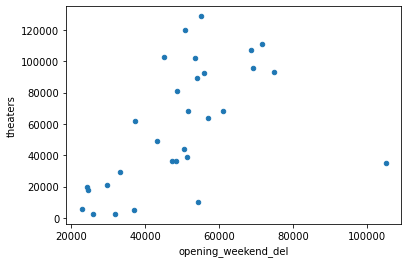

In [53]:
movies_correlation.plot('opening_weekend_del', 'theaters', kind = 'scatter')

создала новый столбец с общими сборами по миру + домашними сборами


In [54]:
dataframe_movies['Total_gross'] = dataframe_movies[['worldwide_gross_del','domestic_gross_del']].sum(axis=1)

In [55]:
dataframe_movies

,rank,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,release_year,release_month,adults,year period,сезон,production_cost_del,worldwide_gross_del,domestic_gross_del,opening_weekend_del,Total_gross
0,1,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019,4,0,2010-ыe,spring,400000.0,2797800.564,858373.000,357115.007,3656173.564
1,2,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011,5,0,2010-ыe,spring,379000.0,1045713.802,241071.802,90151.958,1286785.604
2,3,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015,4,0,2010-ыe,spring,365000.0,1395316.979,459005.868,191271.109,1854322.847
3,4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015,12,0,2010-ыe,winter,306000.0,2064615.817,936662.225,247966.675,3001278.042
4,5,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018,4,0,2010-ыe,spring,300000.0,2048359.754,678815.482,257698.183,2727175.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,The Spiderwick Chronicles,92500000,71195053,162839667,19004058.0,PG,Adventure,3847.0,96.0,2008,2,0,2000-ыe,winter,92500.0,162839.667,71195.053,19004.058,234034.720
494,495,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004,10,0,2000-ыe,autumn,92000.0,631441.092,261441.092,70467.623,892882.184
495,496,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013,2,1,2010-ыe,winter,92000.0,304249.198,67349.198,24834.845,371598.396
496,497,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004,4,0,2000-ыe,spring,92000.0,23911.362,22406.362,9124.701,46317.724


сгруппировала данные сборов по годам


In [56]:
total_gross_mean = dataframe_movies.groupby('release_year')['Total_gross'].mean()

на графике видна сильная просадка по сборам в 2020 году; как раз в этот момент было закрытие кинотеатров из-за COVID-19\
можно сказать, что до ковида индустрия (если судить по топ-фильмам) показывала постепенный рост по прибыли с просадками


<AxesSubplot:xlabel='release_year'>

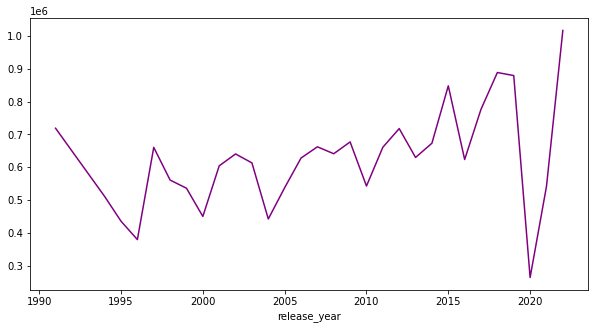

In [57]:
fig, ax = plt.subplots(figsize = (10, 5))
dataframe_movies.groupby('release_year')['Total_gross'].mean().plot(color=['purple'])